In [2]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [3]:
# Cargar los datos
data = pd.read_csv('C:/python/Cleaned-Data.csv')

In [4]:
# Limpieza de datos
data = data.drop_duplicates()
data = data.dropna()

In [5]:
# Preparar los datos (incluyendo codificación de variables categóricas)
categorical_features = data.select_dtypes(include=['object']).columns
numeric_features = data.select_dtypes(include=['number']).columns.drop('Severity_Severe')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

X = data.drop('Severity_Severe', axis=1)
y = data['Severity_Severe']

In [6]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [7]:
# Crear y ajustar el modelo de árbol de decisión
dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [50, 75, 100],
    'min_samples_leaf': [25, 30, 35]
}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [25, 30, 35],
                         'min_samples_split': [50, 75, 100]},
             scoring='accuracy')

In [8]:
# Mejor modelo
best_model = grid_search.best_estimator_

# Predecir las etiquetas en el conjunto de prueba
y_pred = best_model.predict(X_test)

# Reporte de clasificación
print(classification_report(y_test, y_pred, target_names=['No Severe', 'Severe']))


              precision    recall  f1-score   support

   No Severe       1.00      1.00      1.00     47641
      Severe       1.00      1.00      1.00     15719

    accuracy                           1.00     63360
   macro avg       1.00      1.00      1.00     63360
weighted avg       1.00      1.00      1.00     63360



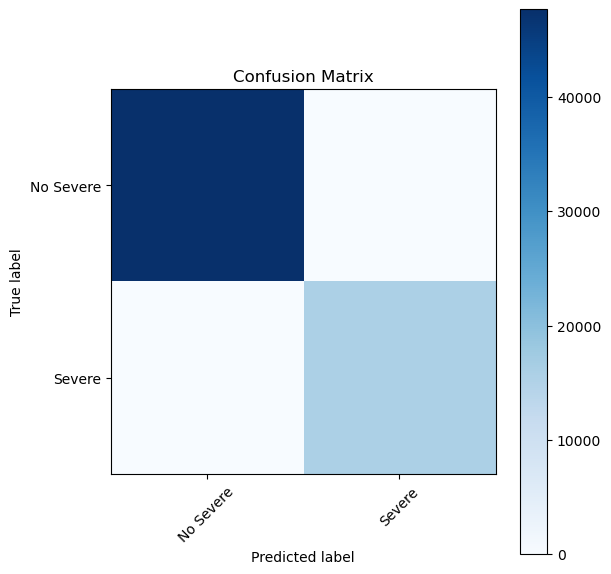

In [9]:

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['No Severe', 'Severe'], rotation=45)
plt.yticks(tick_marks, ['No Severe', 'Severe'])
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


In [10]:
# Cálculo de la precisión (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 1.00


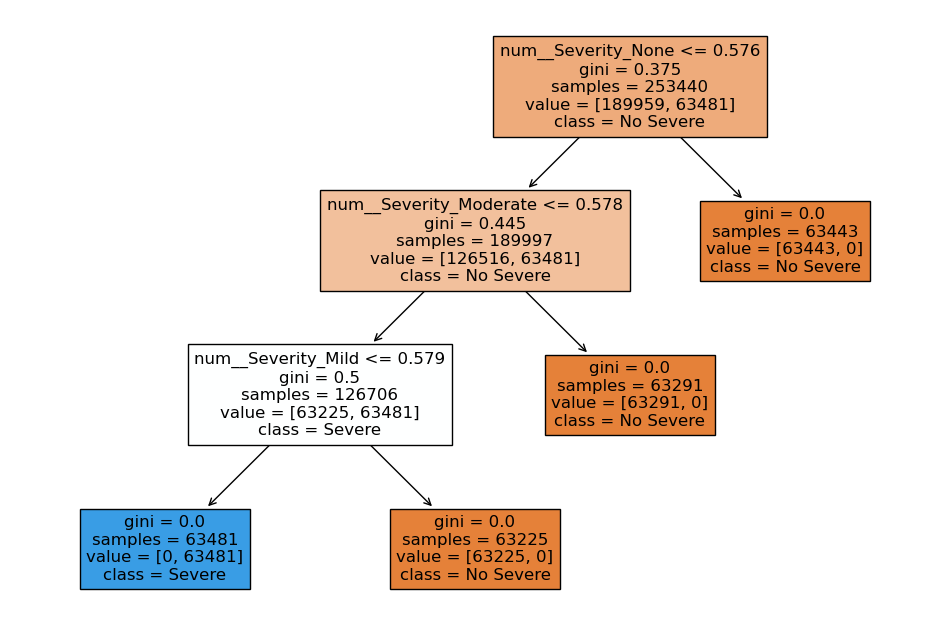

In [11]:
# Visualización del árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(best_model, filled=True, feature_names=preprocessor.get_feature_names_out(), class_names=['No Severe', 'Severe'])
plt.show()


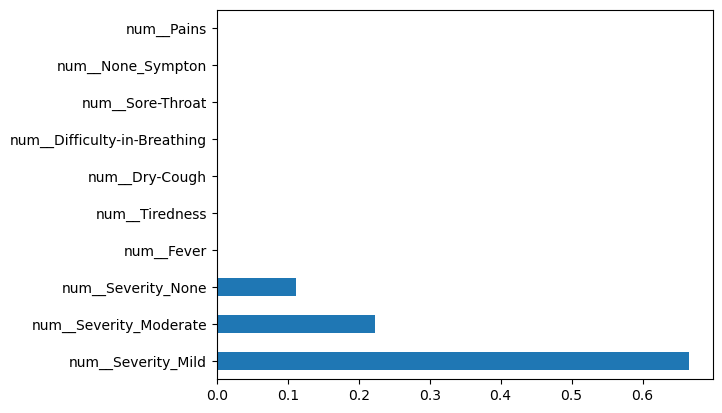

In [12]:
# Gráfico de importancia de las características
feature_importances = pd.Series(best_model.feature_importances_, index=preprocessor.get_feature_names_out())
feature_importances.nlargest(10).plot(kind='barh')
plt.show()
